Requirements: kaleido, imbalanced-learn/imblearn, seaborn, tensorflow, plotly

In [ ]:
!pip3 install kaleido
!pip3 install -U imbalanced-learn
!pip3 install -U imblearn

In [ ]:
!pip3 install tensorflow

In [ ]:
!pip3 install -U plotly

In [ ]:
!pip3 install --upgrade nbformat
#Need to restart kernel after upgrading

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
sns.set_theme(context = 'notebook', style='darkgrid',palette='muted')

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df.Amount.describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

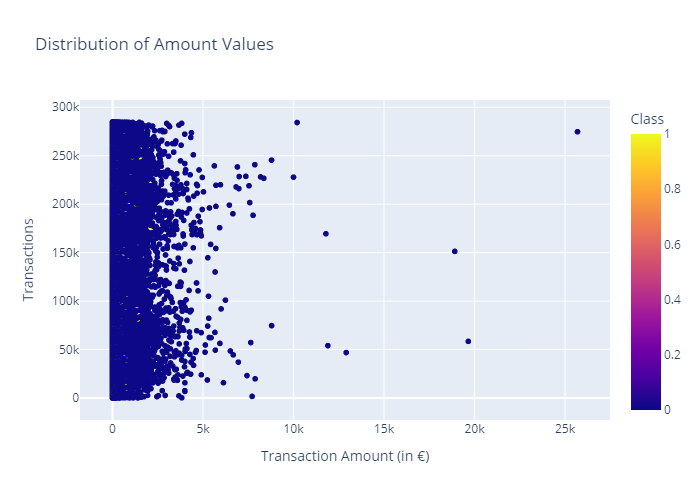

In [4]:
# Distribution of Amount
fig = px.scatter(df, x = 'Amount', y =df.index, color = df.Class,
                title = 'Distribution of Amount Values')
fig.update_layout(xaxis_title='Transaction Amount (in €)',
                    yaxis_title='Transactions')
fig.show('png')

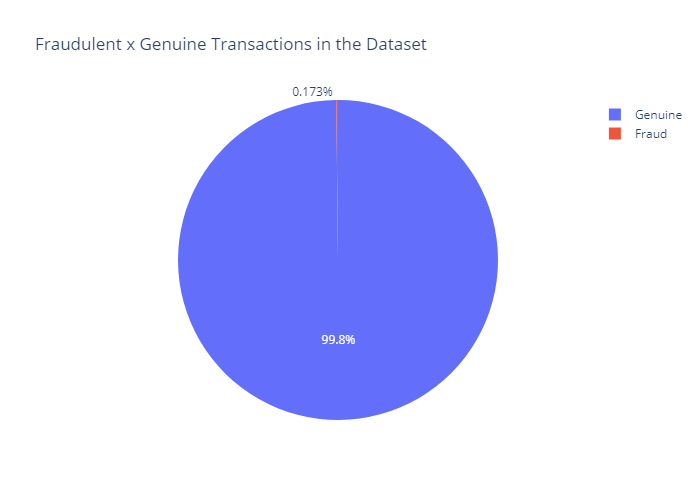

In [5]:
# Visualizing Class distribution
fig = px.pie(df.Class,values = df.Class.value_counts(),
             names=['Genuine', 'Fraud'], title='Fraudulent x Genuine Transactions in the Dataset')
fig.show('png')

In [6]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Small number of credit card fraud. Data set is an imbalanced one. May be a good choice for tree based classification.

In [7]:
df.query("Class ==1").Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

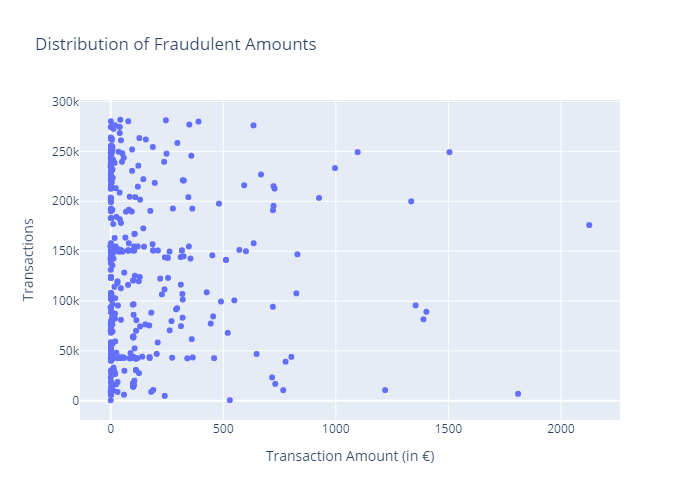

In [8]:
#Plotting the distribution of frauds from the previous cell

fig = px.scatter(df.query("Class==1"), x = 'Amount', y =df.query("Class==1").index,
                title = 'Distribution of Fraudulent Amounts')
fig.update_layout(xaxis_title='Transaction Amount (in €)',
                    yaxis_title='Transactions')
fig.show('png')

In [9]:
#Data is for two days and Time has no bearing on the outcome - Dropping this column
df = df.drop(columns = ['Time'], axis = 1)

#Defining Target and independent variables
X = df.drop(columns=['Class'], axis=1)
y = df.Class

In [10]:
train_x, test_x, train_y,test_y = train_test_split(X, y, test_size= 0.3, random_state = 43)
print('X Train size: ', train_x.shape)
print('X Test size: ', test_x.shape)
print('X Test proportion ', "%s%%"%round((len(test_x) / (len(train_x) + len(test_x))) * 100))
print('Y Train size: ', train_y.shape)
print('Y Test size: ', test_y.shape)
print('Y Test proportion ', "%s%%"%round((len(test_y) / (len(train_y) + len(test_y))) * 100))

X Train size:  (199364, 29)
X Test size:  (85443, 29)
X Test proportion  30%
Y Train size:  (199364,)
Y Test size:  (85443,)
Y Test proportion  30%


In [11]:
# Scaling data on the training set
scaler = StandardScaler()
train_x['Amount'] = scaler.fit_transform(train_x.Amount.values.reshape(-1,1))
train_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
121715,0.946585,-0.477232,1.125240,0.539594,-0.284746,2.044454,-1.107094,0.858359,0.757033,-0.243686,...,-0.264693,0.073049,0.480088,0.152317,-0.988593,-0.114120,0.429715,0.079519,0.001352,-0.304757
237657,0.576463,2.030073,-0.611792,4.778283,1.254968,0.187478,0.654865,0.104889,-2.131360,0.881073,...,0.337044,-0.373438,-0.863810,0.110527,-0.624468,-0.696531,0.047726,0.307903,0.071014,-0.338501
125409,-0.371917,0.802396,1.602017,0.962824,0.162209,-0.056155,0.534209,0.041759,-0.140030,-0.441235,...,0.037978,-0.174726,-0.372197,-0.126800,-0.163161,-0.116845,-0.456065,0.158938,0.139298,-0.279429
185407,0.279182,0.979691,-0.839398,-0.363316,0.498648,-0.826509,0.523397,0.117643,-0.175906,-0.652655,...,-0.225143,0.346644,1.050577,-0.198386,-0.660784,-0.146822,-0.108213,-0.075189,-0.079419,-0.350371
271031,2.041316,-0.133068,-1.184580,0.228655,0.041167,-0.713710,0.053515,-0.149359,0.352028,0.251910,...,-0.223034,-0.262135,-0.671701,0.291932,-0.344714,-0.296704,0.199342,-0.077090,-0.074009,-0.342550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57651,1.329068,0.204284,-0.564466,-0.092949,0.307466,-0.900528,0.549748,-0.431283,-0.304128,-0.133860,...,0.095409,-0.070395,-0.167586,-0.230588,-0.333616,0.699297,1.115086,-0.110771,-0.009798,-0.211862
40753,-4.527956,4.069376,-1.317954,-2.168467,-1.299852,-0.983344,-0.488052,1.214137,2.560772,3.479258,...,1.785428,-0.510938,-0.702728,0.170823,-0.464632,0.693128,0.818503,1.208189,0.548388,-0.347354
248063,-1.076957,0.270538,0.616710,-2.120793,-0.431797,-0.441375,0.341214,0.338197,0.553661,-1.538777,...,-0.202595,0.310100,0.782980,0.046081,0.808762,-0.344984,0.529112,-0.113788,0.061897,0.046576
150848,-1.007139,-0.124772,-0.836051,0.537874,3.352716,0.560313,0.317828,0.201762,0.460599,-0.230179,...,-0.536759,0.108765,0.677111,-0.480064,-0.993498,0.133175,-0.340300,0.107638,-0.070339,-0.207495


In [12]:
# Scaling data on the testing set
scaler = StandardScaler()
test_x['Amount'] = scaler.fit_transform(test_x.Amount.values.reshape(-1,1))
test_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
116085,-1.361745,0.780398,0.493537,0.779496,-0.080206,0.169270,0.335758,0.493880,-0.521924,0.065060,...,-0.588804,0.173493,0.547959,0.224393,-0.342181,-0.300761,-0.306579,-0.202904,0.006313,-0.080070
206493,2.073311,0.265580,-1.745544,0.492756,0.286109,-1.427709,0.310907,-0.422277,0.505541,-0.488961,...,-0.166542,0.191552,0.767662,-0.043917,-0.156863,0.295408,-0.096150,0.002101,-0.031715,-0.356867
145335,-0.399908,-1.321966,-0.845327,-2.411469,1.114166,-1.437364,1.110978,-0.771218,-2.942400,1.068159,...,0.294972,0.256023,0.896290,-0.036145,0.736655,1.039259,0.244197,-0.312491,-0.251445,0.288138
201692,-1.036573,-2.574157,0.652199,-2.210011,-0.574365,-0.566596,-0.491650,0.154731,-1.856954,0.856049,...,0.406363,0.134752,-0.061675,0.660786,-0.508381,0.108543,-0.167297,-0.120329,0.003283,0.721612
222845,2.256626,-1.518978,-0.692405,-1.637132,-1.436432,-0.347211,-1.430306,0.023128,-1.135951,1.744016,...,-0.489080,-0.120598,0.127961,0.228358,-0.439873,-0.313481,-0.166751,0.020676,-0.061106,-0.314495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200612,-1.249870,-2.817359,-0.486830,-0.708353,2.552407,-2.993268,-1.202301,-0.170190,-0.844148,0.671408,...,0.759968,0.528053,0.766200,0.913322,-0.005302,-1.851013,-0.559582,0.255322,0.410366,-0.197384
132764,-0.541390,1.355217,0.712119,0.734910,0.350939,-0.008572,0.454335,0.365784,-0.966494,-0.521445,...,-0.055865,0.205791,0.605876,-0.158236,-0.417795,-0.196932,-0.273414,0.070932,0.095644,-0.319375
210937,1.847110,-0.520171,-1.583724,0.176128,0.661850,0.924150,-0.250039,0.304255,0.464568,0.226064,...,-0.263025,0.392138,1.233673,-0.050407,-1.581569,-0.029189,0.690783,-0.030224,-0.087693,-0.155704
259763,1.999871,-0.103139,-1.388265,0.160581,0.240692,-0.592323,0.101517,-0.177957,0.292479,0.151369,...,-0.137883,0.323884,1.007869,0.006103,0.814137,0.246050,-0.161136,-0.025531,-0.056119,-0.278915


In [13]:
from imblearn.over_sampling import SMOTE
train_x, train_y = SMOTE().fit_resample(train_x,train_y) 

train_y.value_counts()

Class
0    199022
1    199022
Name: count, dtype: int64

In [14]:
%%time
#Using a bunch of classifiers and tabulate the results to compare
#Classifiers

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 43)
random_forest.fit(train_x,train_y)
 
y_predictions_rf = random_forest.predict(test_x)
 
# Applying Decision Tree Classifier 
decision_tree = DecisionTreeClassifier(random_state = 43)
decision_tree.fit(train_x,train_y)
 
y_predictions_dt = decision_tree.predict(test_x)
 
# Applying Ada Boost Classifier 
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 43)
ada_boost.fit(train_x,train_y)
 
y_predictions_ab = ada_boost.predict(test_x)
 
# Applying Gradient Boosting Classifier 
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 43)
gradient_boosting.fit(train_x,train_y)
 
y_prediction_gb = gradient_boosting.predict(test_x)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



CPU times: total: 19min 24s
Wall time: 19min 25s


In [15]:
from sklearn.metrics import roc_auc_score, roc_curve

result = pd.DataFrame({'model': ['Random Forest'],
					   'accuracy': [accuracy_score(test_y, y_predictions_rf)],
					   'precision': [precision_score(test_y, y_predictions_rf)],
					   'recall': [recall_score(test_y, y_predictions_rf)],
					   'f1': [f1_score(test_y, y_predictions_rf)],
					   'roc_auc': [roc_auc_score(y_true=test_y, y_score=random_forest.predict_proba(test_x)[:, 1])]})
result

,model,accuracy,precision,recall,f1,roc_auc
0,Random Forest,0.999321,0.819444,0.786667,0.802721,0.975716


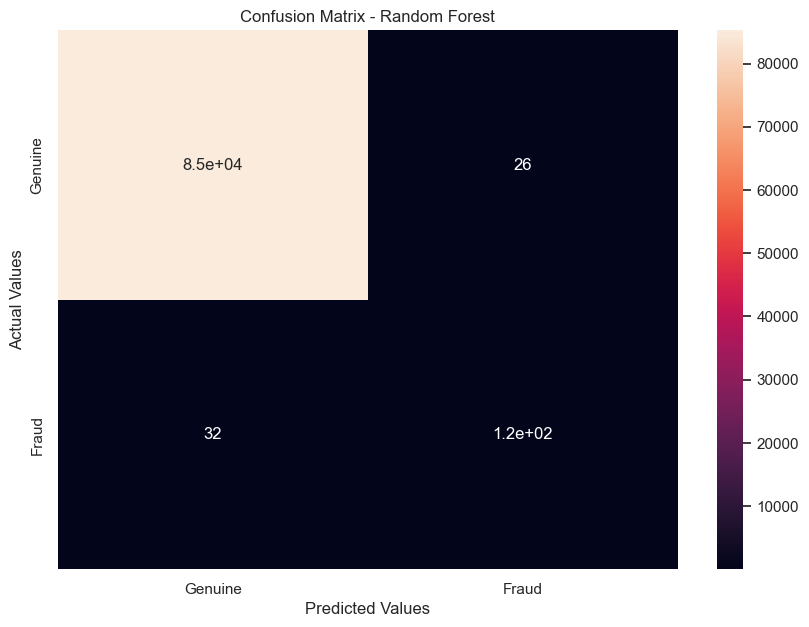

In [16]:
#Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(test_y, y_predictions_rf)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

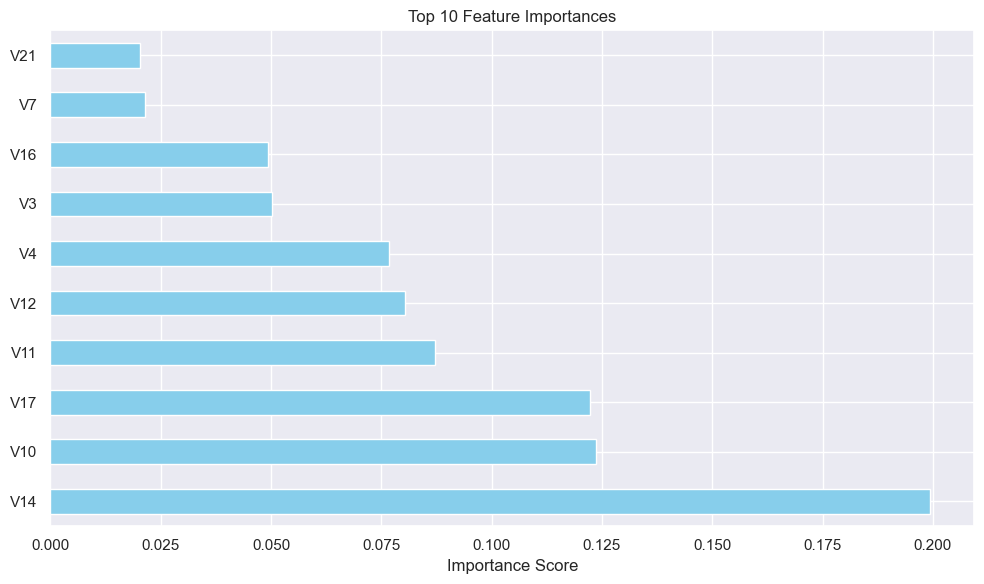

In [17]:
feature_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

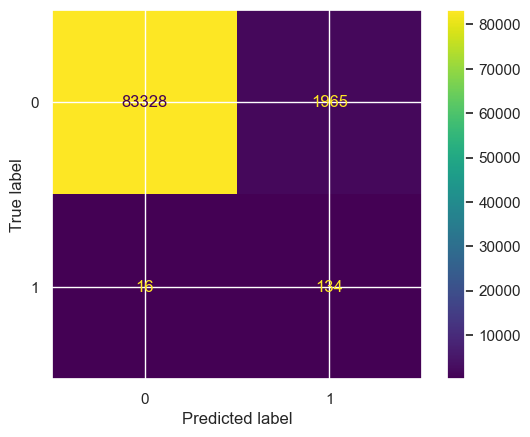

In [18]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve


logreg_clf = LogisticRegression(random_state=43, max_iter=1000).fit(train_x, train_y)
y_pred = logreg_clf.predict(test_x)
log_cm = confusion_matrix(test_y, y_pred, labels=logreg_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=logreg_clf.classes_)

log_disp.plot()
plt.show()



In [19]:
temp = pd.DataFrame({'model': ['Logistic Regression'],
					   'accuracy': [accuracy_score(test_y, y_pred)],
					   'precision': [precision_score(test_y, y_pred)],
					   'recall': [recall_score(test_y, y_pred)],
					   'f1': [f1_score(test_y, y_pred)],
					   'roc_auc': [roc_auc_score(y_true=test_y, y_score=logreg_clf.predict_proba(test_x)[:, 1])]})

result = pd.concat([result, temp], axis=0).sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
result

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.976815,0.063840,0.893333,0.119164,0.989506
1,Random Forest,0.999321,0.819444,0.786667,0.802721,0.975716


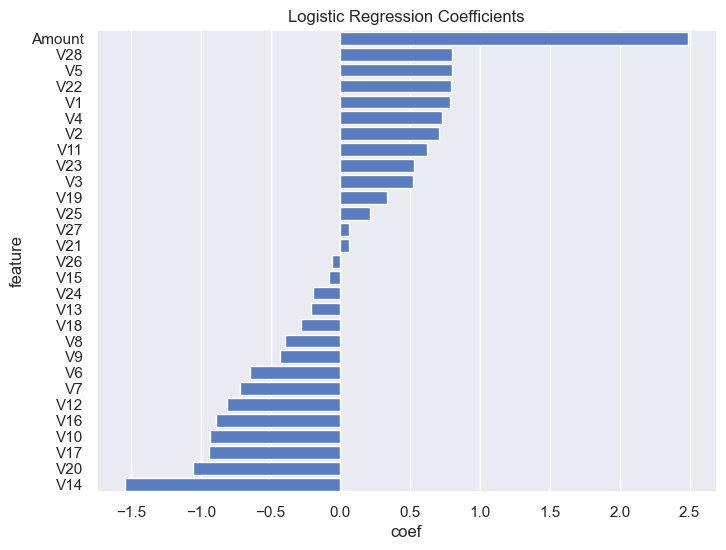

In [20]:
#Feature importance
coefs = pd.DataFrame({'feature': train_x.columns,
					  'coef': logreg_clf.coef_[0]})
coefs = coefs.sort_values(by='coef', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=coefs, x='coef', y='feature')
plt.title('Logistic Regression Coefficients')

plt.show()

In [ ]:
#Decision Tree Fitting


In [21]:
#Summary of Decision Tree Classifier
temp = pd.DataFrame({'model': ['Decision Tree'],
					   'accuracy': [accuracy_score(test_y, y_predictions_dt)],
					   'precision': [precision_score(test_y, y_predictions_dt)],
					   'recall': [recall_score(test_y, y_predictions_dt)],
					   'f1': [f1_score(test_y, y_predictions_dt)],
					   'roc_auc': [roc_auc_score(y_true=test_y, y_score=decision_tree.predict_proba(test_x)[:, 1])]})
result

result = pd.concat([result, temp], axis=0).sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
result

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.976815,0.063840,0.893333,0.119164,0.989506
1,Random Forest,0.999321,0.819444,0.786667,0.802721,0.975716
2,Decision Tree,0.996875,0.325373,0.726667,0.449485,0.862008


In [22]:
#Ada Boost
temp = pd.DataFrame({'model': ['Ada Boost'],
					   'accuracy': [accuracy_score(test_y, y_predictions_ab)],
					   'precision': [precision_score(test_y, y_predictions_ab)],
					   'recall': [recall_score(test_y, y_predictions_ab)],
					   'f1': [f1_score(test_y, y_predictions_ab)],
					   'roc_auc': [roc_auc_score(y_true=test_y, y_score=ada_boost.predict_proba(test_x)[:, 1])]})
result

result = pd.concat([result, temp], axis=0).sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
result

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.976815,0.063840,0.893333,0.119164,0.989506
1,Ada Boost,0.984645,0.095967,0.920000,0.173804,0.986893
2,Random Forest,0.999321,0.819444,0.786667,0.802721,0.975716
3,Decision Tree,0.996875,0.325373,0.726667,0.449485,0.862008


In [23]:
#Gradient Boosting
temp = pd.DataFrame({'model': ['Gradient Boosting'],
					   'accuracy': [accuracy_score(test_y, y_prediction_gb)],
					   'precision': [precision_score(test_y, y_prediction_gb)],
					   'recall': [recall_score(test_y, y_prediction_gb)],
					   'f1': [f1_score(test_y, y_prediction_gb)],
					   'roc_auc': [roc_auc_score(y_true=test_y, y_score=gradient_boosting.predict_proba(test_x)[:, 1])]})
result

result = pd.concat([result, temp], axis=0).sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
result

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.976815,0.063840,0.893333,0.119164,0.989506
1,Ada Boost,0.984645,0.095967,0.920000,0.173804,0.986893
2,Gradient Boosting,0.988015,0.118007,0.900000,0.208655,0.981672
3,Random Forest,0.999321,0.819444,0.786667,0.802721,0.975716
4,Decision Tree,0.996875,0.325373,0.726667,0.449485,0.862008


#Lets try something else

In [ ]:
#!pip install --upgrade pip
#!pip install tensorflow
#!pip install -U keras
#!pip show tensorflow
python3.13.2 

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix,classification_report
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import joblib
from keras.layers import Activation, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

<Axes: xlabel='Amount'>

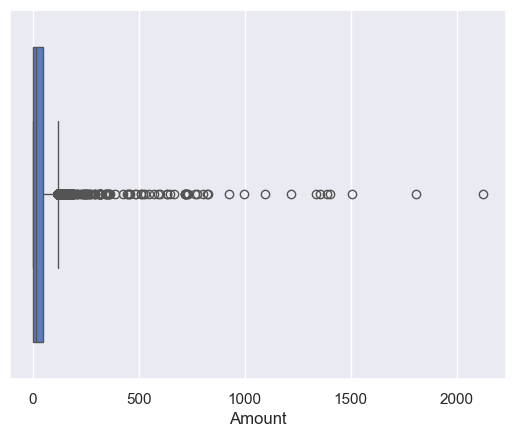

In [45]:
df['Class'].value_counts()
sns.boxplot(x=df['Amount'])

In [26]:
mean = df['Amount'].mean()
std = df['Amount'].std()

# Keep only values within 3 standard deviations
df_no_outliers = df[(df['Amount'] > mean - 3*std) & (df['Amount'] < mean + 3*std)]

In [27]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Separate fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Calculate IQR on 'Amount' column of non-fraud data
Q1 = non_fraud['Amount'].quantile(0.25)
Q3 = non_fraud['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from non-fraud
non_fraud = non_fraud[(non_fraud['Amount'] >= lower_bound) & (non_fraud['Amount'] <= upper_bound)]

# Reassign df to the cleaned version
df = pd.concat([non_fraud, fraud], ignore_index=True)


df['Class'].value_counts()

Class
0    252453
1       492
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

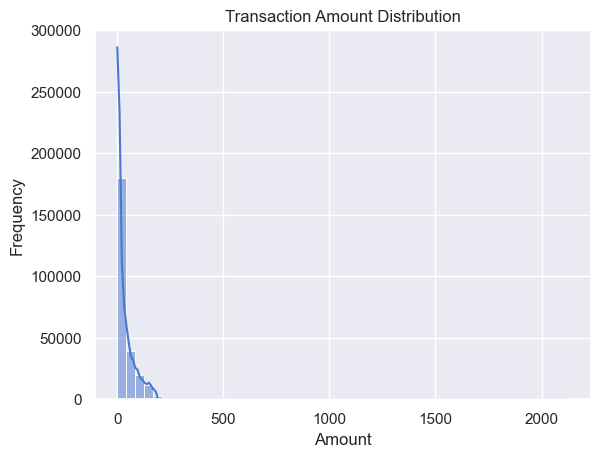

In [28]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

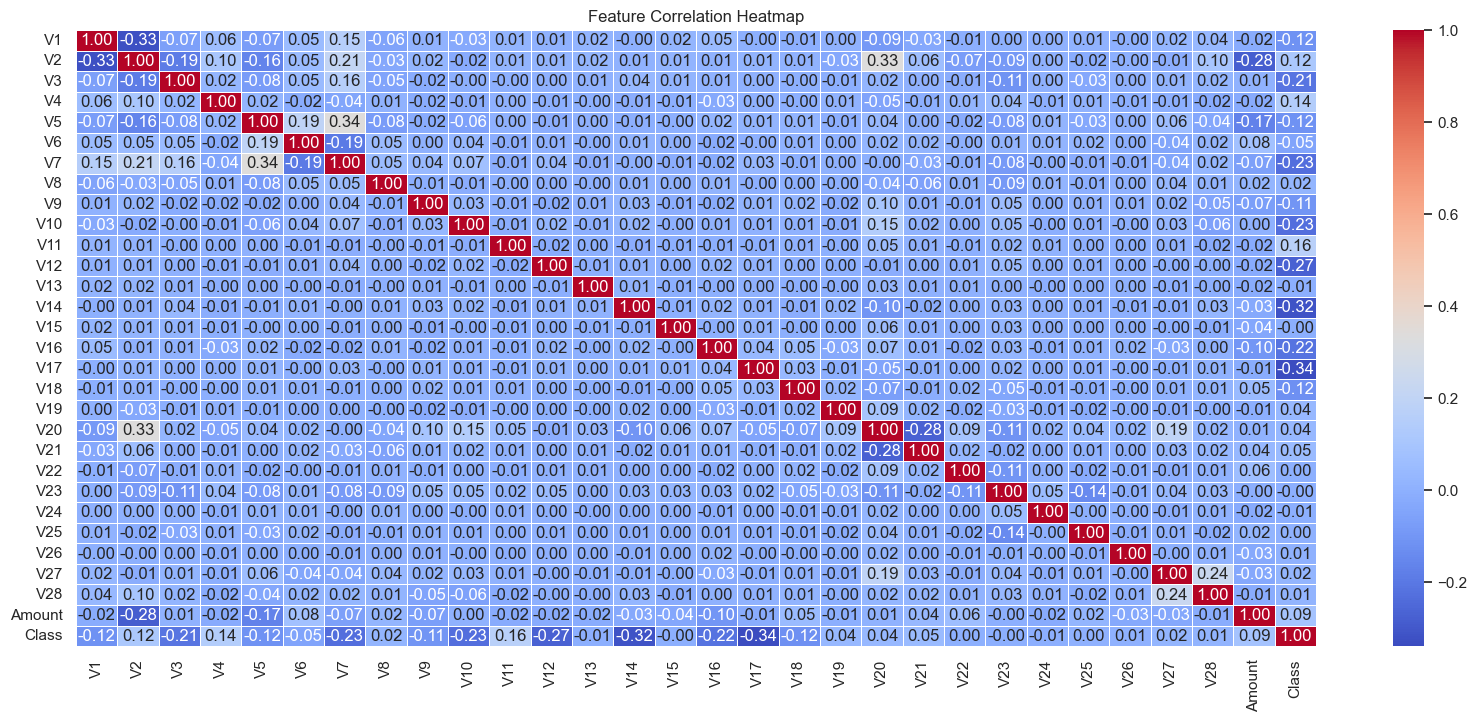

In [29]:
# Calculate correlation matrix
corr = df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')

In [30]:
# Split into Input and Output Elements

X_train_full, X_test, y_train_full, y_test  = train_test_split(X, y,
    test_size=0.20, stratify=y, random_state=43)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full,
    test_size=0.10, stratify=y_train_full, random_state=43
)

print("X_train  = ", X_train.shape ," y_train = ", y_train.shape)
print("X_test   = ", X_test.shape ," y_test = ", y_test.shape)
print("X_valid  = ", X_valid.shape ," y_valid = ", y_valid.shape)

X_train  =  (205060, 29)  y_train =  (205060,)
X_test   =  (56962, 29)  y_test =  (56962,)
X_valid  =  (22785, 29)  y_valid =  (22785,)


In [32]:
# Fit scaler on TRAIN only, then transform all three sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled  = scaler.transform(X_test)

# Resample (SMOTE) **only** your scaled TRAIN set
smote = SMOTE(sampling_strategy=0.3, random_state=42) # minority is 0.3 if majority
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [37]:
model = Sequential()

model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 512)            │        15,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,009 (746.13 KB)

 Trainable params: 191,009 (746.13 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=2000,
    validation_split=0.1,
    callbacks=[checkpoint, early_stop],
    verbose=1)

best_model = tf.keras.models.load_model('best_model.keras')

Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 7:21 5s/step - accuracy: 0.2535 - loss: 1.762 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.3689 - loss: 1.499 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.4493 - loss: 1.335 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5888 - loss: 1.059 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6644 - loss: 0.910 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7135 - loss: 0.808 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7485 - loss: 0.731 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7749 - loss: 0.670 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7957 - loss: 0.621 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8125 - loss: 0.581 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8265 - loss: 0.547 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8382 - loss: 0.518 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8483 - loss: 0.493 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8571 - loss: 0.471 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3:07 105ms/st ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step   ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/st ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st ━━━━━━━━━━━━━━━━━━━━ 

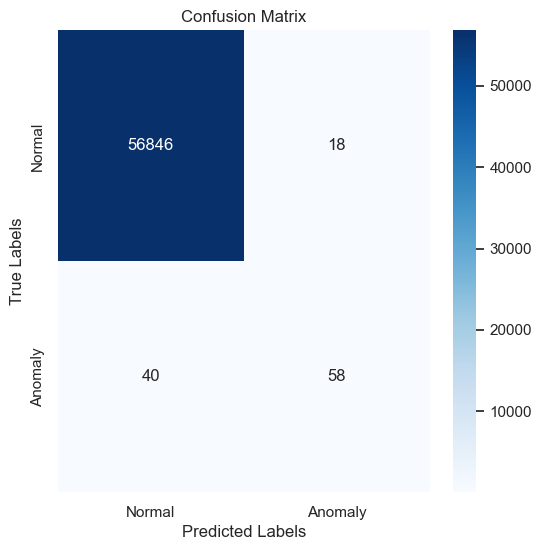

In [47]:
predictions = model.predict(X_test)

predictions = (predictions > 0.5).astype(int)  

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

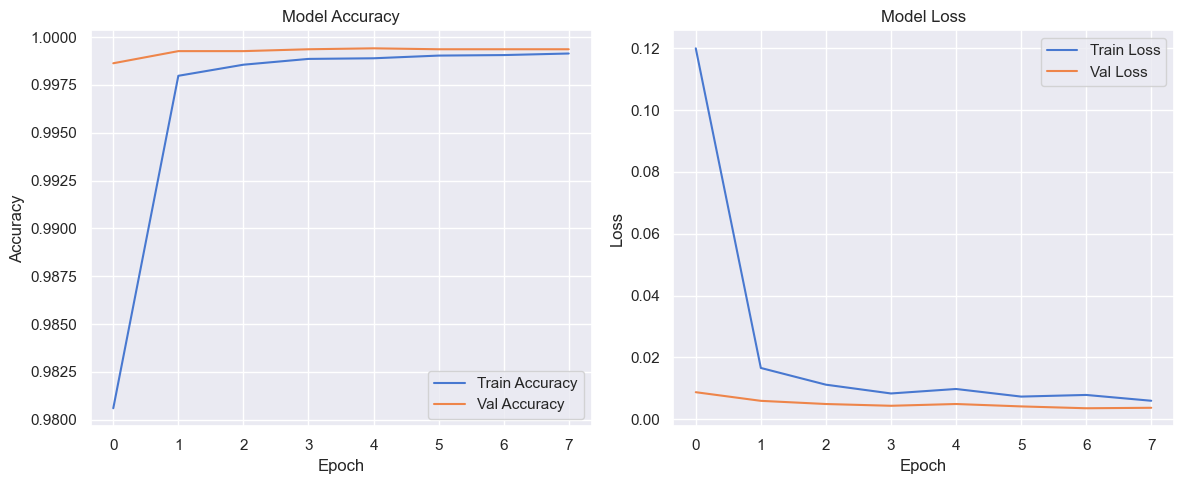

In [48]:
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

The neural nets used reasonable performance. Emphasis was placed on "not missing" too many fraud data.